In [77]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [78]:
df = pd.read_csv('streetcar_delay-winter-2019.csv')

In [79]:
df['datetime'] = df['Report Date'] + ' ' + df['Time']

In [80]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Report Date  2436 non-null   object        
 1   Route        2436 non-null   int64         
 2   Time         2436 non-null   object        
 3   Day          2436 non-null   object        
 4   Location     2433 non-null   object        
 5   Incident     2436 non-null   object        
 6   Delay        2433 non-null   float64       
 7   Gap          2430 non-null   float64       
 8   Direction    2434 non-null   object        
 9   Vehicle      2389 non-null   float64       
 10  datetime     2436 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 209.5+ KB


In [82]:
df = df[(df['datetime'] >'2019-11-27') & (df['datetime'] < '2020-01-05')]

In [83]:
df['dow'] = df['datetime'].dt.weekday

In [84]:
df['hour'] = df['datetime'].dt.hour

In [85]:
df['minute'] = df['datetime'].dt.minute

In [86]:
df[df['datetime'].dt.date.astype(str) == '2019-12-02'].sort_values(by = 'Delay', ascending = False)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
888,02-Dec-19,504,8:41:00 AM,Monday,Broadview/Millbrook,General Delay,61.0,66.0,sb,4434.0,2019-12-02 08:41:00,0,8,41
874,02-Dec-19,512,4:40:00 AM,Monday,St Clair,Mechanical,45.0,51.0,B/W,4456.0,2019-12-02 04:40:00,0,4,40
883,02-Dec-19,504,7:11:00 AM,Monday,DUNDAS WEST STN,General Delay,38.0,44.0,NB,4582.0,2019-12-02 07:11:00,0,7,11
896,02-Dec-19,504,2:32:00 PM,Monday,Roncy and Dundas,Investigation,35.0,41.0,E/B,4522.0,2019-12-02 14:32:00,0,14,32
901,02-Dec-19,705,3:00:00 PM,Monday,Leslie St and Queen St E,Late Leaving Garage,34.0,1.0,W/B,4436.0,2019-12-02 15:00:00,0,15,0
872,02-Dec-19,510,1:30:00 AM,Monday,spadina and king,Held By,28.0,36.0,S/B,4465.0,2019-12-02 01:30:00,0,1,30
910,02-Dec-19,504,9:58:00 PM,Monday,King St and Yonge St,Investigation,28.0,36.0,W/B,4441.0,2019-12-02 21:58:00,0,21,58
885,02-Dec-19,504,7:39:00 AM,Monday,King/Tecumseth,Mechanical,26.0,35.0,W/B,4423.0,2019-12-02 07:39:00,0,7,39
884,02-Dec-19,505,7:30:00 AM,Monday,Broadview Stn to Dundas W stn,General Delay,20.0,5.0,B/W,3148.0,2019-12-02 07:30:00,0,7,30
897,02-Dec-19,501,2:37:00 PM,Monday,Queensway and Roncy,Investigation,20.0,28.0,E/B,4560.0,2019-12-02 14:37:00,0,14,37


In [87]:
df[df['Incident'] == 'General Delay']

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
709,27-Nov-19,510,8:20:00 AM,Wednesday,Spadina Station,General Delay,10.0,15.0,B/W,4541.0,2019-11-27 08:20:00,2,8,20
710,27-Nov-19,505,8:40:00 AM,Wednesday,Entire Line,General Delay,1.0,1.0,B/W,NaN,2019-11-27 08:40:00,2,8,40
719,27-Nov-19,505,3:16:00 PM,Wednesday,Sherbourne,General Delay,18.0,24.0,W/B,1036.0,2019-11-27 15:16:00,2,15,16
742,28-Nov-19,505,2:30:00 PM,Thursday,Parliament,General Delay,16.0,22.0,W/B,1208.0,2019-11-28 14:30:00,3,14,30
758,29-Nov-19,505,10:51:00 AM,Friday,Dundas W Stn to Broadview Stn,General Delay,30.0,6.0,B/W,8564.0,2019-11-29 10:51:00,4,10,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,28-Dec-19,505,5:46:00 PM,Saturday,Dundas at Ossington,General Delay,9.0,15.0,W/B,3104.0,2019-12-28 17:46:00,5,17,46
1605,31-Dec-19,504,9:50:00 AM,Tuesday,King/Bathurst,General Delay,10.0,16.0,W/B,4560.0,2019-12-31 09:50:00,1,9,50
1629,31-Dec-19,505,8:00:00 PM,Tuesday,Parliament,General Delay,18.0,23.0,W/B,1262.0,2019-12-31 20:00:00,1,20,0
1632,31-Dec-19,506,11:20:00 PM,Tuesday,Carlton and Parliament,General Delay,20.0,26.0,E/B,4498.0,2019-12-31 23:20:00,1,23,20


In [88]:
df[df['Gap']/df['Delay'] == 2]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
699,27-Nov-19,511,12:57:00 AM,Wednesday,Exibition Loop,Emergency Services,8.0,16.0,N/B,4104.0,2019-11-27 00:57:00,2,0,57
702,27-Nov-19,501,6:37:00 AM,Wednesday,Queen/Yonge,Held By,10.0,20.0,E/B,4472.0,2019-11-27 06:37:00,2,6,37
705,27-Nov-19,501,7:30:00 AM,Wednesday,Roncesvalles and Queen,Late Leaving Garage,5.0,10.0,W/B,4434.0,2019-11-27 07:30:00,2,7,30
706,27-Nov-19,504,7:47:00 AM,Wednesday,Roncesvalles and Queen,Late Leaving Garage,5.0,10.0,W/B,4572.0,2019-11-27 07:47:00,2,7,47
707,27-Nov-19,505,8:10:00 AM,Wednesday,Dundas West Stn,Held By,4.0,8.0,E/B,1269.0,2019-11-27 08:10:00,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,04-Jan-20,505,11:51:00 AM,Saturday,Dundas and George St.,Investigation,5.0,10.0,E/B,1115.0,2020-01-04 11:51:00,5,11,51
1698,04-Jan-20,511,1:09:00 PM,Saturday,Exhibition Loop,Mechanical,5.0,10.0,N/B,4500.0,2020-01-04 13:09:00,5,13,9
1702,04-Jan-20,506,7:05:00 PM,Saturday,College and Spadina,Investigation,9.0,18.0,W/B,4447.0,2020-01-04 19:05:00,5,19,5
1703,04-Jan-20,512,8:01:00 PM,Saturday,St. Clair and Landsdowne,Mechanical,7.0,14.0,W/B,4428.0,2020-01-04 20:01:00,5,20,1


In [89]:
df[df['Gap']%df['Delay'] == 0]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
699,27-Nov-19,511,12:57:00 AM,Wednesday,Exibition Loop,Emergency Services,8.0,16.0,N/B,4104.0,2019-11-27 00:57:00,2,0,57
702,27-Nov-19,501,6:37:00 AM,Wednesday,Queen/Yonge,Held By,10.0,20.0,E/B,4472.0,2019-11-27 06:37:00,2,6,37
703,27-Nov-19,501,7:20:00 AM,Wednesday,Queensway/Ellis,Mechanical,1.0,1.0,W/B,4538.0,2019-11-27 07:20:00,2,7,20
705,27-Nov-19,501,7:30:00 AM,Wednesday,Roncesvalles and Queen,Late Leaving Garage,5.0,10.0,W/B,4434.0,2019-11-27 07:30:00,2,7,30
706,27-Nov-19,504,7:47:00 AM,Wednesday,Roncesvalles and Queen,Late Leaving Garage,5.0,10.0,W/B,4572.0,2019-11-27 07:47:00,2,7,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,04-Jan-20,511,1:09:00 PM,Saturday,Exhibition Loop,Mechanical,5.0,10.0,N/B,4500.0,2020-01-04 13:09:00,5,13,9
1702,04-Jan-20,506,7:05:00 PM,Saturday,College and Spadina,Investigation,9.0,18.0,W/B,4447.0,2020-01-04 19:05:00,5,19,5
1703,04-Jan-20,512,8:01:00 PM,Saturday,St. Clair and Landsdowne,Mechanical,7.0,14.0,W/B,4428.0,2020-01-04 20:01:00,5,20,1
1704,04-Jan-20,504,8:07:00 PM,Saturday,Charlotte Loop,Utilized Off Route,9.0,18.0,W/B,4473.0,2020-01-04 20:07:00,5,20,7


In [90]:
df.sort_values(by = 'Delay', ascending = False).head(20)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute
1031,06-Dec-19,506,9:21:00 AM,Friday,Gerrard and Sackville,Diversion,996.0,999.0,B/W,4522.0,2019-12-06 09:21:00,4,9,21
717,27-Nov-19,501,1:30:00 PM,Wednesday,Neville to Long Branch,Mechanical,720.0,0.0,B/W,NaN,2019-11-27 13:30:00,2,13,30
1013,06-Dec-19,306,12:01:00 AM,Friday,Sackville & Gerrard,Diversion,384.0,392.0,B/W,NaN,2019-12-06 00:01:00,4,0,1
833,01-Dec-19,504,7:15:00 AM,Sunday,Kinng and Young,Investigation,300.0,308.0,B/W,4589.0,2019-12-01 07:15:00,6,7,15
1049,06-Dec-19,504,10:32:00 PM,Friday,King & Spadina,Diversion,258.0,263.0,B/W,4481.0,2019-12-06 22:32:00,4,22,32
1549,28-Dec-19,501,3:28:00 PM,Saturday,Queen Street East River,Investigation,242.0,252.0,W/B,4494.0,2019-12-28 15:28:00,5,15,28
1015,06-Dec-19,304,2:00:00 AM,Friday,King & Spadina,Diversion,237.0,247.0,B/W,4500.0,2019-12-06 02:00:00,4,2,0
1413,22-Dec-19,501,10:59:00 AM,Sunday,Dunn / Queen,Investigation,157.0,163.0,E/B,4416.0,2019-12-22 10:59:00,6,10,59
712,27-Nov-19,501,9:00:00 AM,Wednesday,Queen/Beech,Mechanical,142.0,149.0,E/B,4434.0,2019-11-27 09:00:00,2,9,0
1329,18-Dec-19,501,8:59:00 PM,Wednesday,Lakeshore and Silver Moon Drive,Held By,141.0,151.0,E/B,4524.0,2019-12-18 20:59:00,2,20,59


In [91]:
len(df[df['Delay'].isna()])

2

In [92]:
df['Incident'].drop_duplicates()

698               Mechanical
699       Emergency Services
700                  Held By
704      Late Leaving Garage
709            General Delay
713            Investigation
718       Utilized Off Route
743    Overhead - Pantograph
759                Diversion
Name: Incident, dtype: object

In [93]:
df['date_str'] = df['datetime'].dt.date.astype(str)

In [94]:
df.groupby(['date_str', 'Route']).count().sort_values(by = 'Report Date', ascending = False)

Report Date  Time  Day  Location  Incident  Delay  Gap  \
date_str   Route                                                           
2019-11-30 501             17    17   17        17        17     17   17   
2019-12-01 501             15    15   15        15        15     15   15   
2019-12-10 501             13    13   13        13        13     13   13   
2019-12-02 501             12    12   12        12        12     11   11   
2019-11-27 501             12    12   12        12        12     12   12   
...                       ...   ...  ...       ...       ...    ...  ...   
2019-12-15 511              1     1    1         1         1      1    1   
2019-12-16 510              1     1    1         1         1      1    1   
           511              1     1    1         1         1      1    1   
           512              1     1    1         1         1      1    1   
2020-01-04 705              1     1    1         1         1      1    1   

                  Direction  Vehicle  datetime  dow  hour  minute  
date_str   Route                                                   
2019-11-30 501           17       12        17   17    17      17  
2019-12-01 501           15       15        15   15    15      15  
2019-12-10 501           13       13        13   13    13      13  
2019-12-02 501           12       12        12   12    12      12  
2019-11-27 501           12       11        12   12    12      12  
...                     ...      ...       ...  ...   ...     ...  
2019-12-15 511            1        1         1    1     1       1  
2019-12-16 510            1        1         1    1     1       1  
           511            1        1         1    1     1       1  
           512            1        1         1    1     1       1  
2020-01-04 705            1        1         1    1     1       1  

[314 rows x 13 columns]

In [95]:
df[(df['Route'] == 501) & (df['date_str'] == '2019-12-10')]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute,date_str
1121,10-Dec-19,501,12:10:00 AM,Tuesday,Queen and Spadina,Investigation,10.0,20.0,W/B,4537.0,2019-12-10 00:10:00,1,0,10,2019-12-10
1123,10-Dec-19,501,6:22:00 AM,Tuesday,Queen/Lewslie,Held By,9.0,18.0,E/B,4496.0,2019-12-10 06:22:00,1,6,22,2019-12-10
1124,10-Dec-19,501,6:51:00 AM,Tuesday,Queen/Yonge,Mechanical,7.0,13.0,W/B,4470.0,2019-12-10 06:51:00,1,6,51,2019-12-10
1127,10-Dec-19,501,7:30:00 AM,Tuesday,Roncesvalles and Queen,Late Leaving Garage,2.0,7.0,W/B,4458.0,2019-12-10 07:30:00,1,7,30,2019-12-10
1131,10-Dec-19,501,8:30:00 AM,Tuesday,Neville Loop,Mechanical,7.0,13.0,W/B,4415.0,2019-12-10 08:30:00,1,8,30,2019-12-10
1133,10-Dec-19,501,8:39:00 AM,Tuesday,Neville Loop,Mechanical,13.0,20.0,W/B,4476.0,2019-12-10 08:39:00,1,8,39,2019-12-10
1135,10-Dec-19,501,9:10:00 AM,Tuesday,Lakeshore/Kipling,Investigation,23.0,33.0,E/B,4502.0,2019-12-10 09:10:00,1,9,10,2019-12-10
1136,10-Dec-19,501,9:26:00 AM,Tuesday,Queen/Roncesvalles,Mechanical,7.0,13.0,W/B,4449.0,2019-12-10 09:26:00,1,9,26,2019-12-10
1139,10-Dec-19,501,2:04:00 PM,Tuesday,Queen and Greenwood,Mechanical,8.0,15.0,E/B,4456.0,2019-12-10 14:04:00,1,14,4,2019-12-10
1140,10-Dec-19,501,2:16:00 PM,Tuesday,Neville Loop,Mechanical,7.0,14.0,E/B,4449.0,2019-12-10 14:16:00,1,14,16,2019-12-10


In [96]:
df[df['Incident'] == 'General Delay'].sort_values(by = ['Route', 'datetime']).head(50)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,dow,hour,minute,date_str
1535,27-Dec-19,9,10:05:00 PM,Friday,broadview stn,General Delay,8.0,16.0,W/B,1031.0,2019-12-27 22:05:00,4,22,5,2019-12-27
855,01-Dec-19,501,11:58:00 AM,Sunday,Wineva / Queen,General Delay,12.0,19.0,W/B,4510.0,2019-12-01 11:58:00,6,11,58,2019-12-01
861,01-Dec-19,501,12:56:00 PM,Sunday,Sunnyside,General Delay,7.0,14.0,W/B,4510.0,2019-12-01 12:56:00,6,12,56,2019-12-01
862,01-Dec-19,501,1:04:00 PM,Sunday,Sunnyside Loop,General Delay,7.0,14.0,W/B,4497.0,2019-12-01 13:04:00,6,13,4,2019-12-01
863,01-Dec-19,501,1:29:00 PM,Sunday,Sunnyside Loop,General Delay,7.0,14.0,W/B,4528.0,2019-12-01 13:29:00,6,13,29,2019-12-01
864,01-Dec-19,501,1:39:00 PM,Sunday,Sunnyside Loop,General Delay,7.0,14.0,E/B,4484.0,2019-12-01 13:39:00,6,13,39,2019-12-01
867,01-Dec-19,501,6:29:00 PM,Sunday,Queensway and Roncesvalles,General Delay,113.0,120.0,E/B,4506.0,2019-12-01 18:29:00,6,18,29,2019-12-01
962,04-Dec-19,501,8:00:00 AM,Wednesday,Neville Loop-Woodbine,General Delay,8.0,15.0,W/B,NaN,2019-12-04 08:00:00,2,8,0,2019-12-04
1072,07-Dec-19,501,7:28:00 PM,Saturday,Russell Yard,General Delay,6.0,12.0,E/B,4523.0,2019-12-07 19:28:00,5,19,28,2019-12-07
1493,26-Dec-19,501,5:42:00 PM,Thursday,Queen and St Patrick,General Delay,16.0,24.0,E/B,4577.0,2019-12-26 17:42:00,3,17,42,2019-12-26


In [97]:
clean_list = []

for index, row in df.iterrows():
    if 600 <= row['Route'] < 900:
        continue
        
    new_hour = row['hour']
    delay = row['Delay']
    minute = row['minute']
    new_date = row['datetime'].date()
    new_dow = new_dow = new_date.weekday()
    clean_list.append([row['datetime'].date(), row['dow'], row['hour'], row['Route']])
    
    if delay + minute > 60:

            
        for i in range(int((delay + minute)/60)):
            new_hour = new_hour + 1
            if new_hour > 23:
                new_hour = new_hour - 24
                new_date = row['datetime'].date() + datetime.timedelta(days=1)
                new_dow = new_date.weekday()

            clean_list.append([new_date, new_dow, new_hour, row['Route']])       

    else:
        pass

In [98]:
cleaned = pd.DataFrame.from_records(clean_list, columns = ['date', 'dow', 'hour', 'route'])
cleaned

,date,dow,hour,route
0,2019-11-27,2,0,504
1,2019-11-27,2,0,511
2,2019-11-27,2,1,511
3,2019-11-27,2,6,501
4,2019-11-27,2,6,512
...,...,...,...,...
1196,2020-01-04,5,17,504
1197,2020-01-04,5,19,506
1198,2020-01-04,5,20,512
1199,2020-01-04,5,20,504


In [99]:
cleaned = cleaned[~cleaned['date'].astype(str).isin(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-31', '2020-01-01'])].copy()

In [100]:
cleaned['period'] = None

In [101]:
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([7,8,9])), 'AM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([4,5,6])), 'EM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([11,12,13])), 'MD', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([17,18,19])), 'PM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([20,21,22])), 'EV', cleaned['period'])

In [102]:
cleaned = cleaned[(~cleaned['period'].isna()) ].reset_index(drop = True)
cleaned

,date,dow,hour,route,period
0,2019-11-27,2,6,501,EM
1,2019-11-27,2,6,512,EM
2,2019-11-27,2,6,501,EM
3,2019-11-27,2,7,501,AM
4,2019-11-27,2,7,508,AM
...,...,...,...,...,...
533,2020-01-03,4,13,505,MD
534,2020-01-03,4,13,506,MD
535,2020-01-03,4,17,503,PM
536,2020-01-03,4,18,503,PM


In [103]:
cleaned = cleaned.drop_duplicates()

In [104]:
summary = cleaned.groupby(['date', 'period']).count()[['route']].reset_index().rename(columns = {'route':'incidents'})

In [105]:
len(summary[summary['period'] == 'AM'])

23

In [106]:
summary[summary['period'] == 'AM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
45,2019-12-10,AM,11
0,2019-11-27,AM,8
35,2019-12-06,AM,8
54,2019-12-12,AM,8
15,2019-12-02,AM,7
94,2019-12-27,AM,7
25,2019-12-04,AM,7
20,2019-12-03,AM,6
89,2019-12-23,AM,6
84,2019-12-20,AM,6


In [107]:
summary[summary['period'] == 'PM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
78,2019-12-18,PM,12
53,2019-12-11,PM,7
34,2019-12-05,PM,6
88,2019-12-20,PM,6
4,2019-11-27,PM,5
14,2019-11-29,PM,5
98,2019-12-27,PM,5
63,2019-12-13,PM,5
107,2020-01-02,PM,4
39,2019-12-06,PM,4


In [108]:
summary[summary['period'] == 'MD'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
28,2019-12-04,MD,8
13,2019-11-29,MD,7
87,2019-12-20,MD,7
38,2019-12-06,MD,7
110,2020-01-03,MD,6
62,2019-12-13,MD,6
92,2019-12-23,MD,6
43,2019-12-09,MD,6
67,2019-12-16,MD,6
97,2019-12-27,MD,5


In [109]:
summary[summary['period'] == 'EV'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
96,2019-12-27,EV,9
37,2019-12-06,EV,6
2,2019-11-27,EV,5
27,2019-12-04,EV,5
56,2019-12-12,EV,4
17,2019-12-02,EV,3
42,2019-12-09,EV,3
12,2019-11-29,EV,3
91,2019-12-23,EV,3
86,2019-12-20,EV,3


In [110]:
summary[summary['period'] == 'EM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
36,2019-12-06,EM,11
16,2019-12-02,EM,10
21,2019-12-03,EM,9
60,2019-12-13,EM,6
55,2019-12-12,EM,5
80,2019-12-19,EM,5
26,2019-12-04,EM,5
100,2019-12-30,EM,4
90,2019-12-23,EM,4
31,2019-12-05,EM,3


In [111]:
plt.rcParams['figure.dpi'] = 300

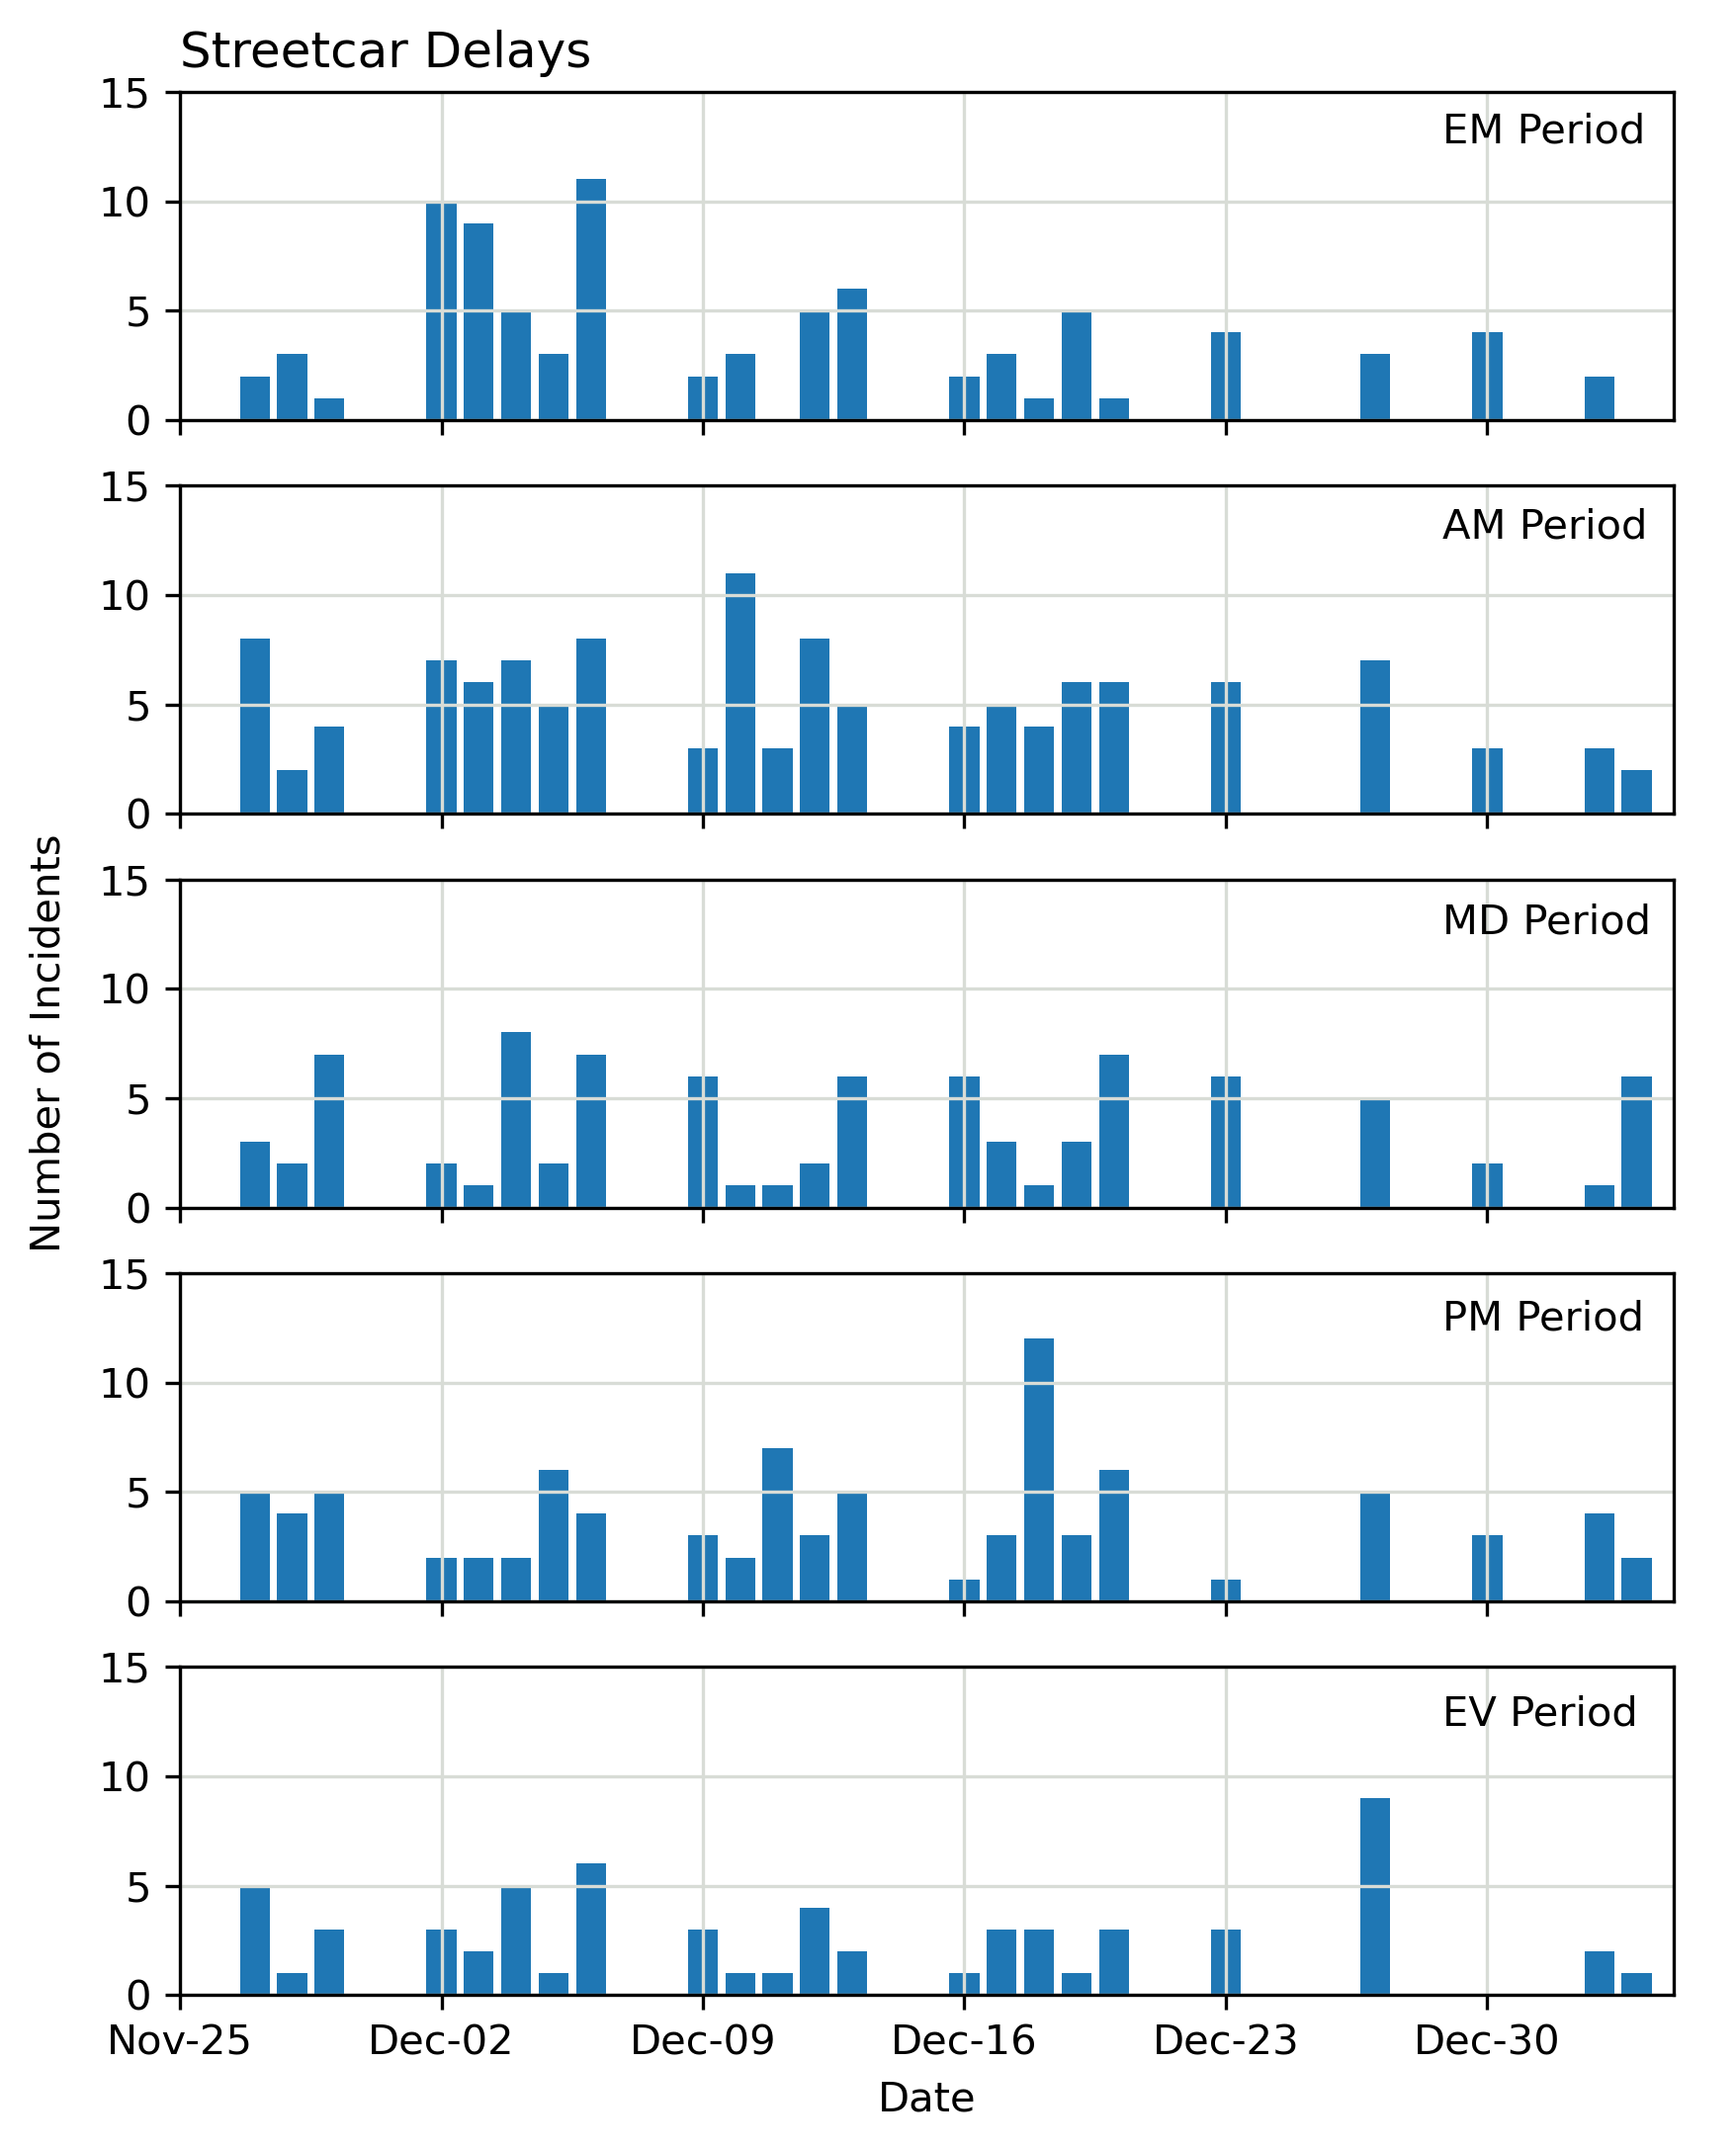

In [114]:
fig, ax = plt.subplots(5)

i = 0
y_str = 0.86

period_list = ['EM','AM','MD','PM','EV']

for period in period_list:
    
    df_sub = summary[summary['period'] == period]
    
    ax[i].bar(df_sub['date'], df_sub['incidents'])
    
    ax[i].set_xlim([datetime.date(2019,11,26), datetime.date(2020,1,4)])
    ax[i].set_ylim([0,15])
    
    ax[i].set_xticks([datetime.date(2019,11,25),
                     datetime.date(2019,12,2),
                     datetime.date(2019,12,9),
                     datetime.date(2019,12,16),
                     datetime.date(2019,12,23),
                     datetime.date(2019,12,30)])


    if i in [0,1,2,3]:
        ax[i].set_xticklabels('')
    else:
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    
        
    fig.text(s = period + ' Period', x = 0.78, y = y_str)

    ax[i].grid(color = 'xkcd:light grey')
    
    
    
    i = i + 1
    y_str = y_str - 0.157
    
fig.add_subplot(111, frameon=False)


plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('Streetcar Delays', ha = 'left', x = 0)

fig.set_size_inches(6.5,8.5)

plt.savefig('streetcar-delay-count.png', dpi = 300, bbox_inches = "tight")

In [115]:
summary.to_csv('streetcar_delay_summary.csv', index = False)
cleaned.to_csv('streetcar_cleaned.csv', index = False)